In [1]:
from utils import set_env

set_env("OPENAI_API_KEY")

In [2]:
from IPython.display import Image, display
from kasflow.graphs.recorder import RecorderGraph, RecorderState
from kasflow.store.duckdb import DuckDBStore

graph = RecorderGraph()
compiled = graph.compiled

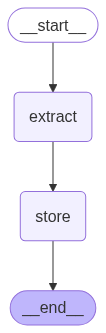

In [3]:
display(Image(graph.draw()))

In [4]:
# no expenses detected
in_state = RecorderState(message="Jalan-jalan ke kintamani")

with DuckDBStore(":memory:") as store:
    out_state = compiled.invoke(in_state, {"configurable": {"store": store}})
    print(out_state)

{'expenses': [], 'message': 'Jalan-jalan ke kintamani', 'stored': False}


In [9]:
# expenses detected
in_state = RecorderState(message="Servis mobil 1.5jt dan Makan siang 35rb")

with DuckDBStore(":memory:") as store:
    out_state = compiled.invoke(in_state, {"configurable": {"store": store}})

    print(f"stored: {out_state['stored']}")

    if out_state.get("store_exception"):
        print(f"store_exception: {out_state['store_exception']}")

    print(f"expenses: {out_state['expenses']}")

stored: True
expenses: [Expense(id=None, amount=Decimal('1500000'), category='transportation', description='Servis mobil'), Expense(id=None, amount=Decimal('35000'), category='food', description='Makan siang')]
